In [1]:
import datetime as dt
from mtgoScraper import *

if __name__ == '__main__':
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq='MS')

    startDate = dt.date(startDate.year, startDate.month, startDate.day)


    rawDeckLists = []
    for eachMonth in months:
        rawDeckLists += mtgoScrape.formatDeckList(queryFormat,eachMonth.year,eachMonth.month)

    skipUrls = []

    urlList = [x['url'] for x in rawDeckLists if x['url'] not in skipUrls if x['date']>=startDate]

    deckList = mtgoScrape.mtgoScrapeMain(urlList)

In [ ]:
decks = [x.deckName for x in deckList]

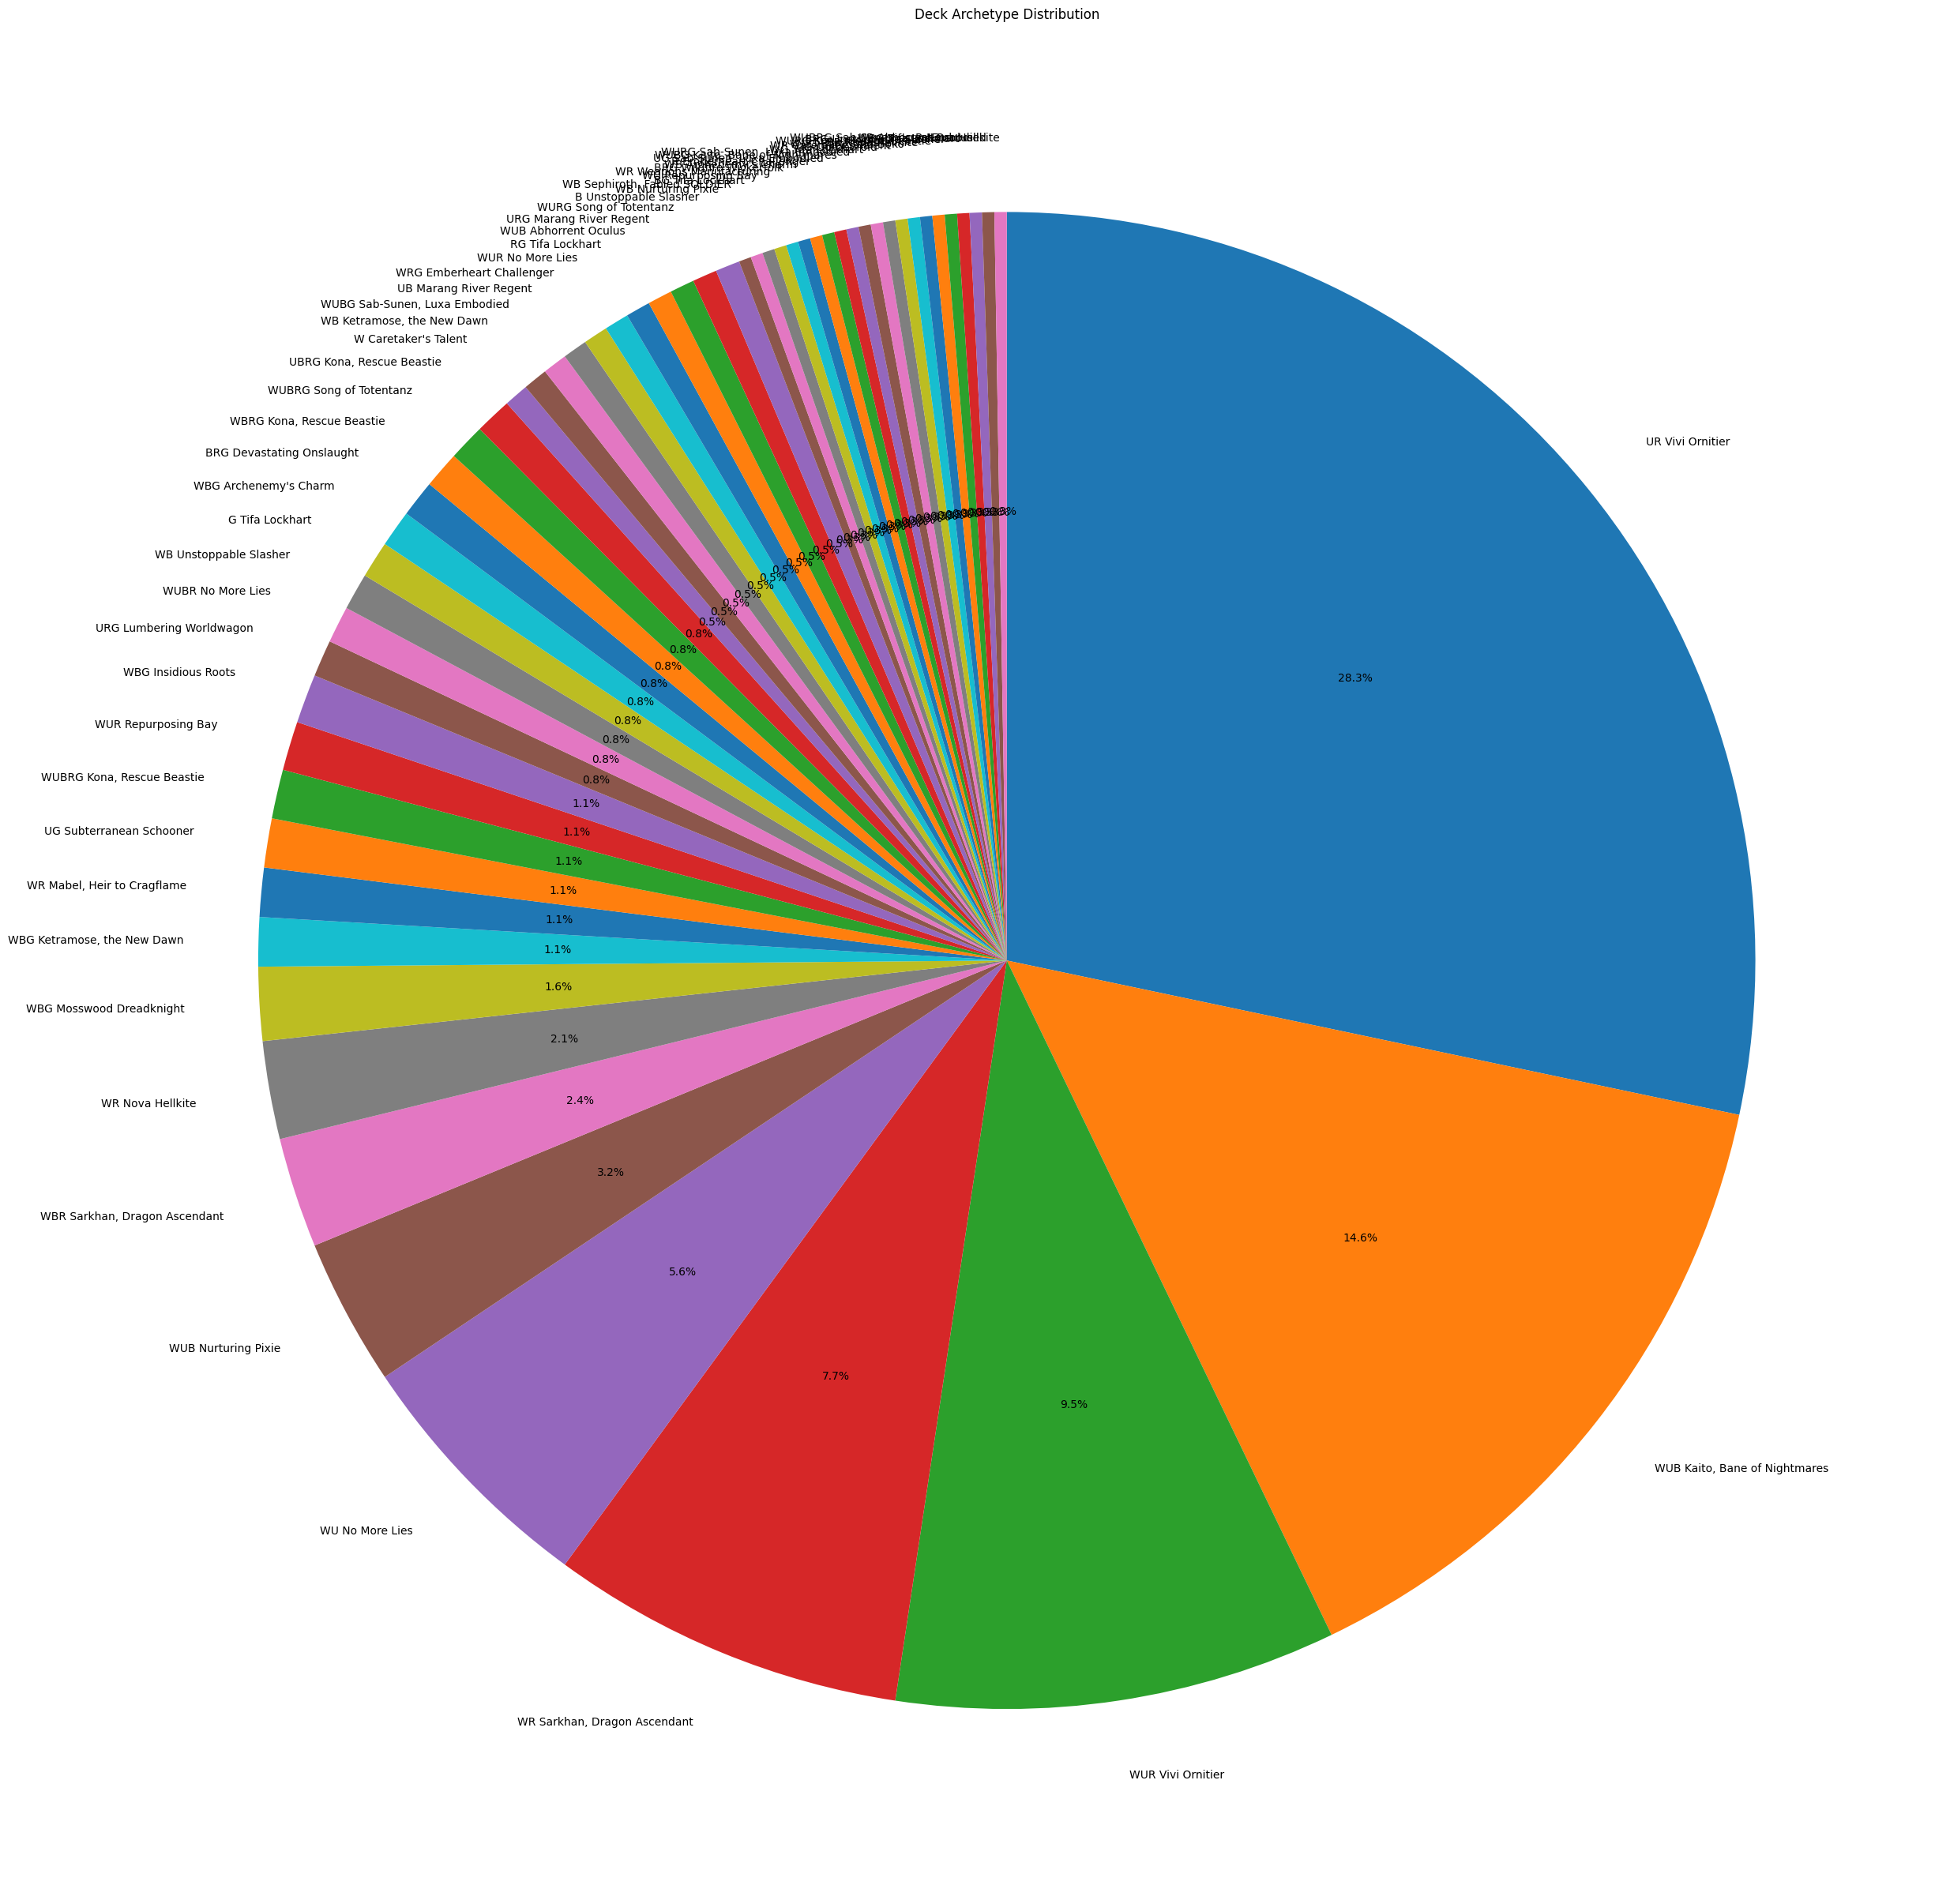

In [ ]:
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
deck_counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Deck Archetype Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


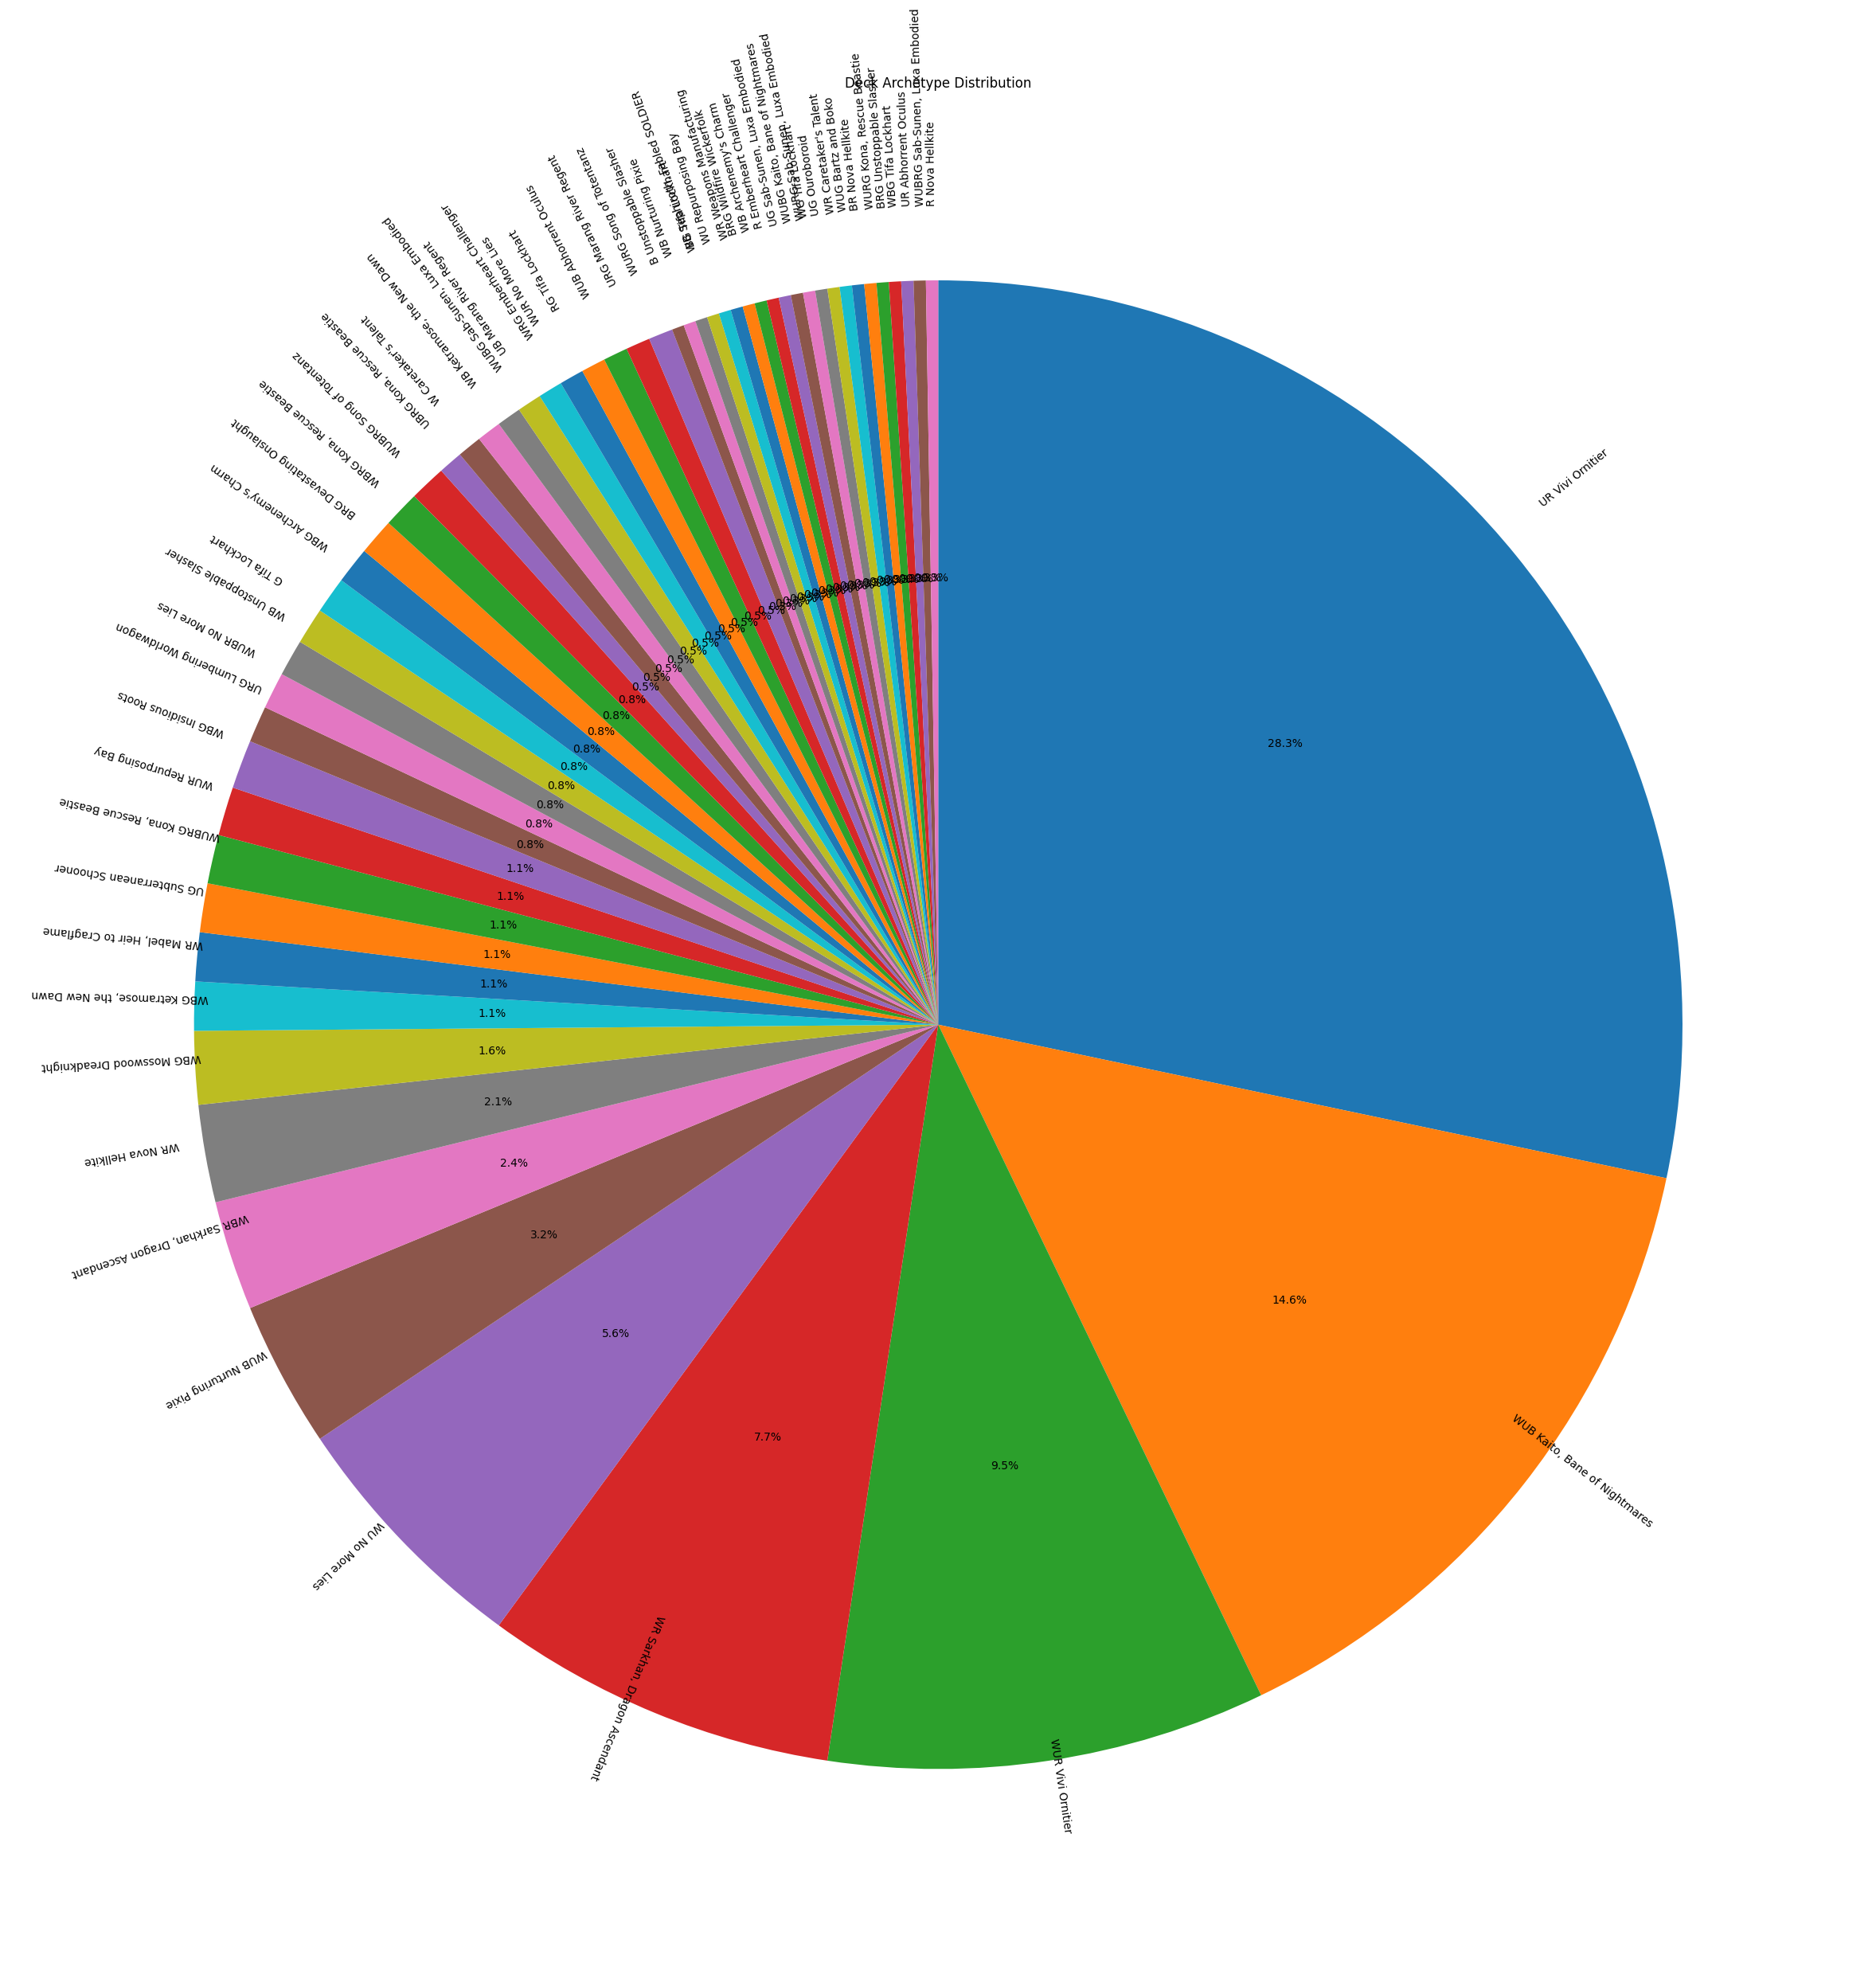

In [4]:
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(25, 25))
wedges, texts, autotexts = ax.pie(
    deck_counts,
    labels=deck_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)

# Rotate each label to align with the radius line
for i, text in enumerate(texts):
    # Get the angle at the center of the wedge
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    rotation = angle

    # Flip upside-down labels to keep them readable
    if rotation > 180:
        rotation -= 180
        text.set_verticalalignment('top')
    else:
        text.set_verticalalignment('bottom')

    text.set_rotation(rotation)
    text.set_horizontalalignment('center')

plt.title("Deck Archetype Distribution")
plt.tight_layout()
plt.show()
